<a href="https://colab.research.google.com/github/VidhiSingh11/Mainflow-internship/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [5]:
# Load the dataset
file_path = '/content/rainfall.csv'
rainfall_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
rainfall_df['date'] = pd.to_datetime(rainfall_df['date'])

In [6]:
# 1. Data Cleaning
# Handling missing values (if any)
rainfall_df.fillna(rainfall_df.mean(), inplace=True)

# Handling outliers using z-score
rainfall_df['rainfall_zscore'] = zscore(rainfall_df['rainfall'])
rainfall_cleaned = rainfall_df[(rainfall_df['rainfall_zscore'].abs() < 3)]


In [7]:
# 2. Exploratory Data Analysis (EDA)
# Descriptive statistics
rainfall_stats = rainfall_cleaned['rainfall'].describe()
print("Descriptive Statistics:\n", rainfall_stats)

Descriptive Statistics:
 count    119.000000
mean       9.484034
std        6.860992
min        0.000000
25%        4.050000
50%        9.500000
75%       14.850000
max       22.400000
Name: rainfall, dtype: float64


The average rainfall is 9.48 mm.
The maximum rainfall recorded is 22.40 mm.


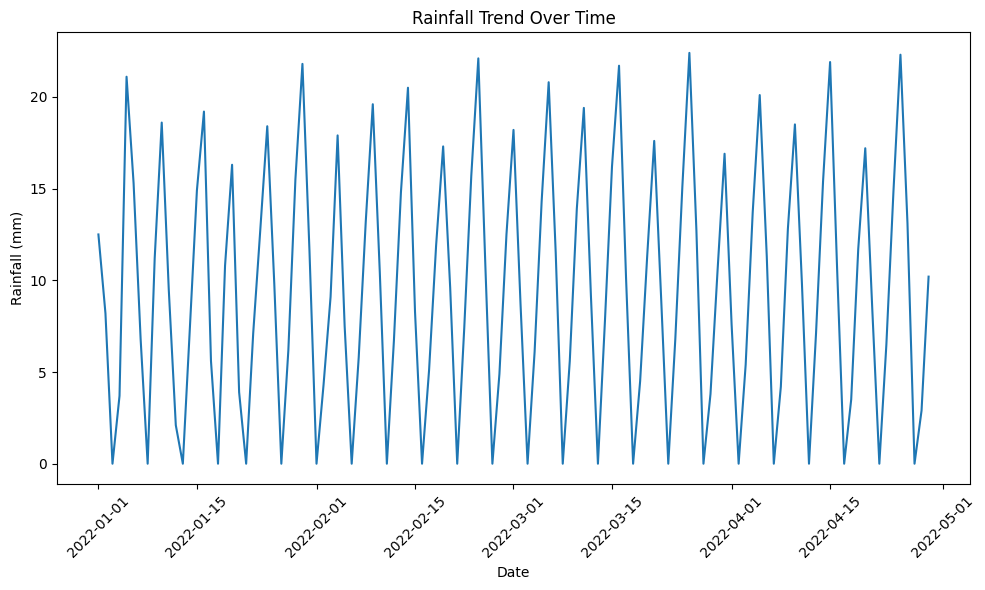

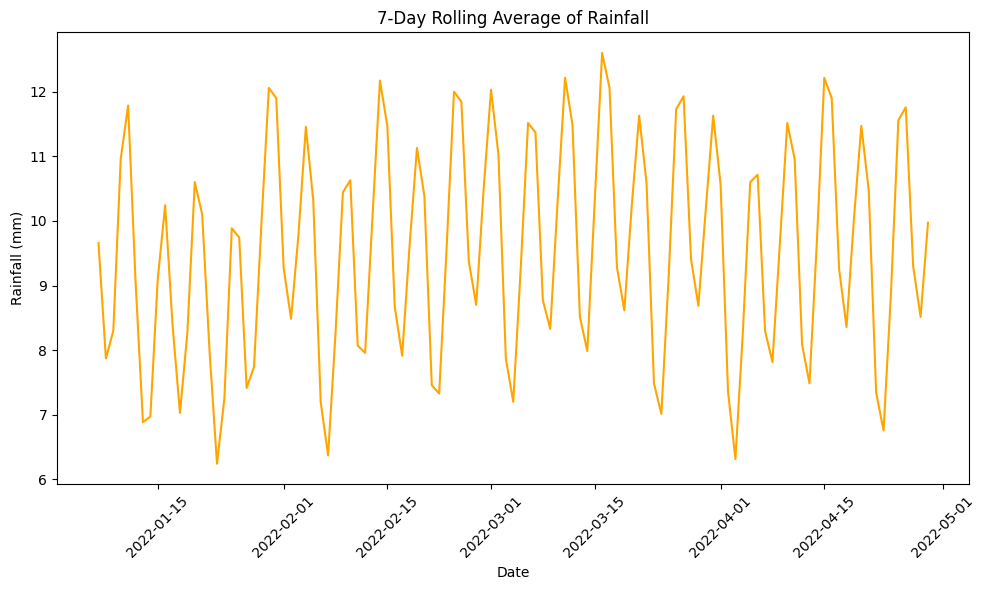

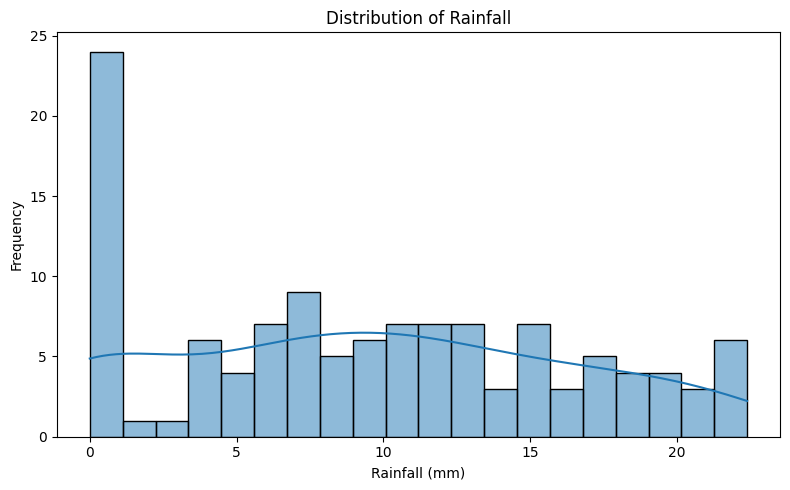

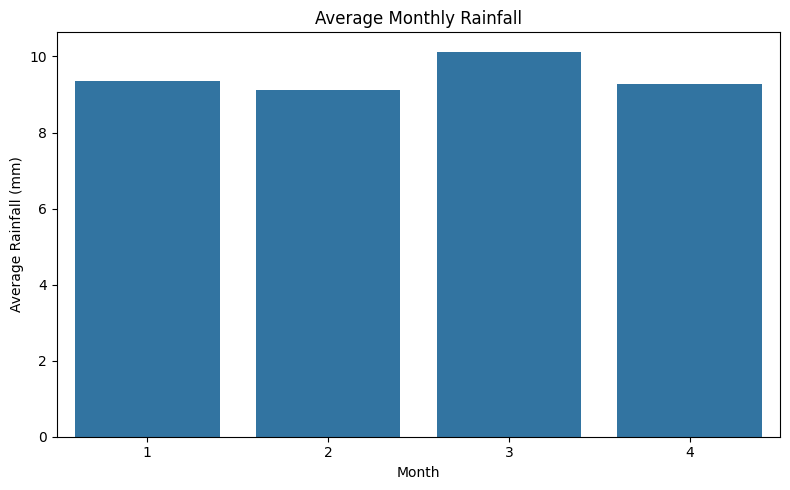

The median rainfall is 9.50 mm.


In [8]:
# 3. Question Formulation and Answering

# Question 1: What is the average rainfall?
avg_rainfall = rainfall_cleaned['rainfall'].mean()
print(f"The average rainfall is {avg_rainfall:.2f} mm.")

# Question 2: What is the maximum rainfall recorded?
max_rainfall = rainfall_cleaned['rainfall'].max()
print(f"The maximum rainfall recorded is {max_rainfall:.2f} mm.")

# Question 3: What is the rainfall trend over time?
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='rainfall', data=rainfall_cleaned)
plt.title('Rainfall Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Question 4: How does the 7-day rolling average smooth out rainfall variations?
rainfall_cleaned['7_day_rolling_avg'] = rainfall_cleaned['rainfall'].rolling(window=7).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='7_day_rolling_avg', data=rainfall_cleaned, color='orange')
plt.title('7-Day Rolling Average of Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Question 5: What is the distribution of rainfall?
plt.figure(figsize=(8, 5))
sns.histplot(rainfall_cleaned['rainfall'], bins=20, kde=True)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Question 6: Does rainfall show any specific pattern over seasons?
# Assuming seasons could be defined by month
rainfall_cleaned['month'] = rainfall_cleaned['date'].dt.month
monthly_avg_rainfall = rainfall_cleaned.groupby('month')['rainfall'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_avg_rainfall.index, y=monthly_avg_rainfall.values)
plt.title('Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.tight_layout()
plt.show()

# Question 7: What is the median rainfall recorded?
median_rainfall = rainfall_cleaned['rainfall'].median()
print(f"The median rainfall is {median_rainfall:.2f} mm.")


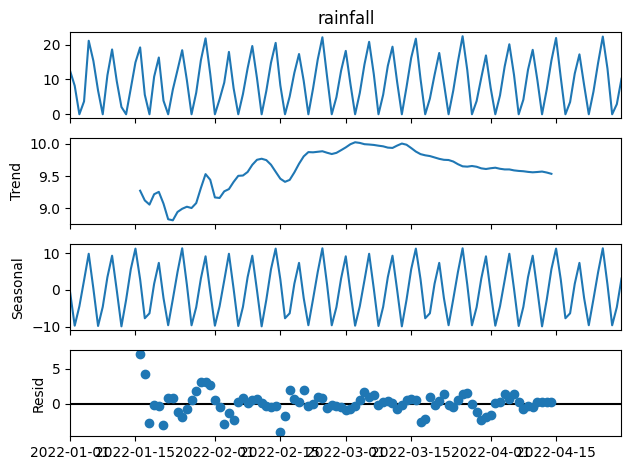

In [9]:
# 1. Time Series Decomposition
# For this, you need to ensure the date column has a frequency (e.g., daily)
from statsmodels.tsa.seasonal import seasonal_decompose

rainfall_cleaned.set_index('date', inplace=True)
decomposition = seasonal_decompose(rainfall_cleaned['rainfall'], model='additive', period=30)
decomposition.plot()
plt.show()


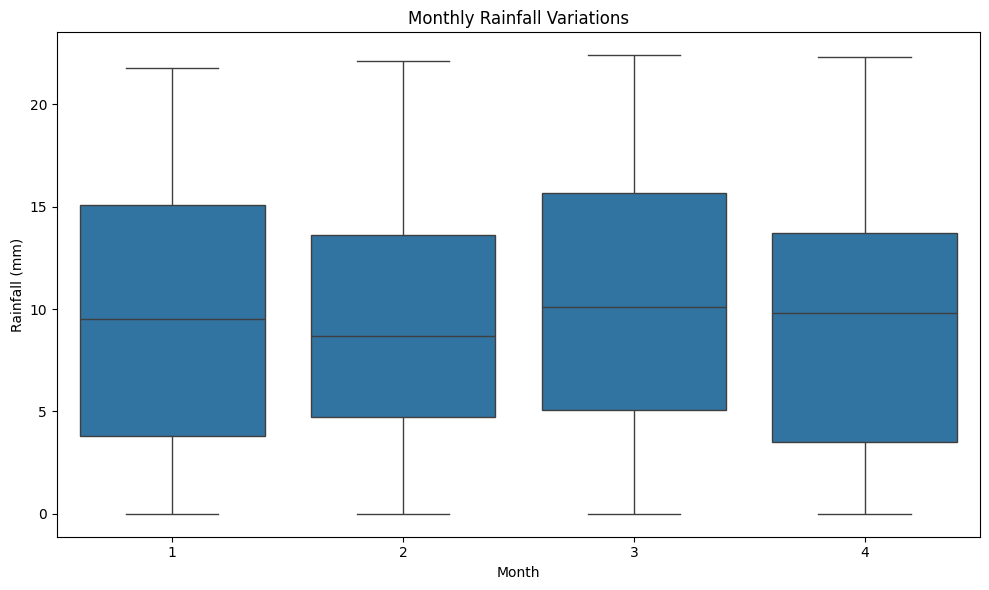

In [10]:
# 2. Boxplot of rainfall over months to check variations
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='rainfall', data=rainfall_cleaned.reset_index())
plt.title('Monthly Rainfall Variations')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.tight_layout()
plt.show()

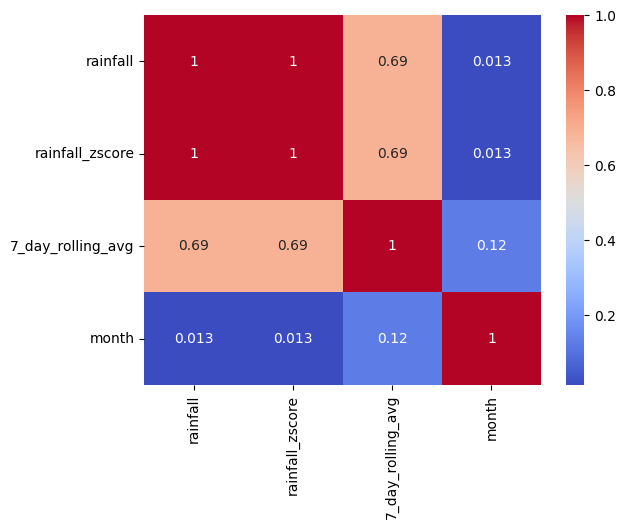

In [11]:
# 3. Heatmap for correlation between variables (if more existed)
sns.heatmap(rainfall_cleaned.corr(), annot=True, cmap='coolwarm')
plt.show()

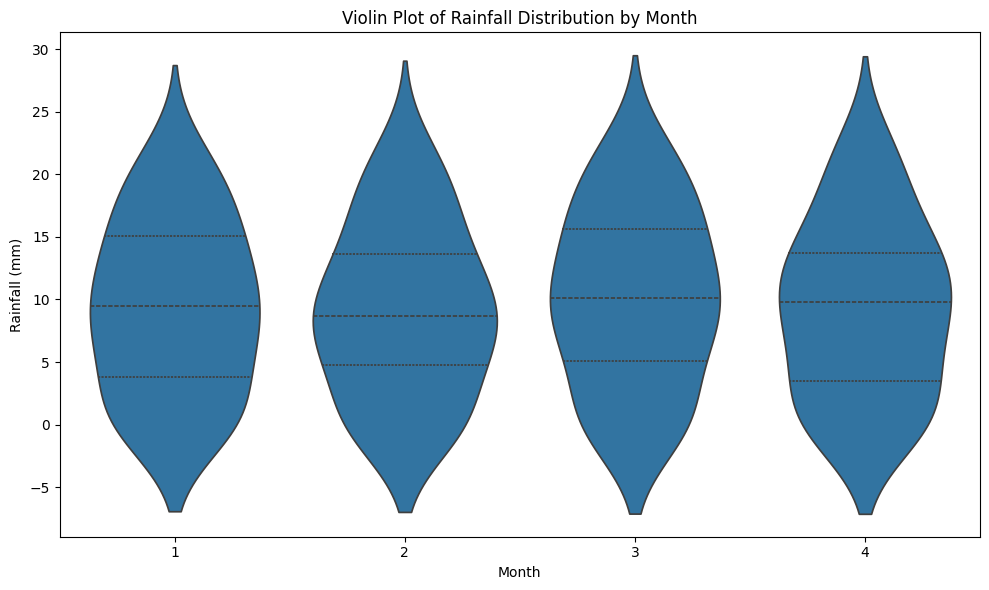

In [12]:
# 4. Violin plot to see rainfall distribution over months
plt.figure(figsize=(10, 6))
sns.violinplot(x='month', y='rainfall', data=rainfall_cleaned.reset_index(), inner='quartile')
plt.title('Violin Plot of Rainfall Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.tight_layout()
plt.show()